In [129]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1. Importando e limpando dados
Vamos começar importando um dos arquivos de despesas em CSV para verificar sua estrutura:

In [130]:
df_example = pd.read_csv("despesas-2019-via-csvdownload/201901.csv", sep=';')
df_example.head(3)

,Mês Ano,Órgão Superior,Órgão/Entidade Vinculada,Unidade Gestora,Área de atuação (Função),Subfunção,Programa Orçamentário,Ação Orçamentária,Programa de Governo,Autor Emenda,Plano Orçamentário,Grupo de Despesa,Elemento de Despesa,Modalidade de Despesa,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos a Pagar Pagos,Unnamed: 18
0,01/2019,26000 - Ministério da Educação,26271 - Fundação Universidade de Brasília,154040 - FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,12 - Educação,364 - Ensino superior,2080 - EDUCACAO DE QUALIDADE PARA TODOS,20RK - FUNCIONAMENTO DE INSTITUICOES FEDERAIS ...,00 - NAO ATRIBUIDO,1479 - AUGUSTO CARVALHO,EIND - EMENDA INDIVIDUAL,3 - Outras Despesas Correntes,18 - Auxílio Financeiro a Estudantes,90 - Reserva de Contingência,"0,00","0,00","0,00","9.600,00",nan
1,01/2019,26000 - Ministério da Educação,26271 - Fundação Universidade de Brasília,154106 - HOSPITAL UNIVERSITARIO DE BRASILIA - HUB,09 - Previdência social,272 - Previdência do regime estatutário,0089 - PREVIDENCIA DE INATIVOS E PENSIONISTAS ...,0181 - APOSENTADORIAS E PENSOES CIVIS DA UNIAO,00 - NAO ATRIBUIDO,0000,0000 - APOSENTADORIAS E PENSOES CIVIS DA UNIAO,1 - Pessoal e Encargos Sociais,03 - Pensões do RPPS e do militar,90 - Reserva de Contingência,"143.332,76","11.007,46","0,00","10.642,44",nan
2,01/2019,26000 - Ministério da Educação,26271 - Fundação Universidade de Brasília,154040 - FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,12 - Educação,331 - Proteção e benefícios ao trabalhador,2109 - PROGRAMA DE GESTAO E MANUTENCAO DO MINI...,212B - BENEFICIOS OBRIGATORIOS AOS SERVIDORES ...,00 - NAO ATRIBUIDO,0000,0005 - AUXILIO-ALIMENTACAO DE CIVIS,3 - Outras Despesas Correntes,04 - Contratação por Tempo Determinado,90 - Reserva de Contingência,"1.084.098,47","79.379,73","0,00","86.703,41",nan


Vamos extrair desse dataframe de exemplo os nomes das colunas que encontraremos nesses arquivos. Criaremos um dataframe vazio com essas colunas e vamos adicionar todos os CSV, relativos a todos os meses dos anos de 2019 e 2020.

In [131]:
df_example.columns

Index(['Mês Ano', 'Órgão Superior', 'Órgão/Entidade Vinculada',
       'Unidade Gestora', 'Área de atuação (Função)', 'Subfunção',
       'Programa Orçamentário', 'Ação Orçamentária', 'Programa de Governo',
       'Autor Emenda', 'Plano Orçamentário', 'Grupo de Despesa',
       'Elemento de Despesa', 'Modalidade de Despesa', 'Valor Empenhado',
       'Valor Liquidado', 'Valor Pago', 'Valor Restos a Pagar Pagos',
       'Unnamed: 18'],
      dtype='object')

In [132]:
df = pd.DataFrame(columns=df_example.columns)
df.head()

,Mês Ano,Órgão Superior,Órgão/Entidade Vinculada,Unidade Gestora,Área de atuação (Função),Subfunção,Programa Orçamentário,Ação Orçamentária,Programa de Governo,Autor Emenda,Plano Orçamentário,Grupo de Despesa,Elemento de Despesa,Modalidade de Despesa,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos a Pagar Pagos,Unnamed: 18


In [133]:
for ano in ('2019', '2020'):
    for mes in ('01','02','03','04','05','06','07','08','09','10','11','12'):
        df_temp = pd.read_csv("despesas-"+ano+"-via-csvdownload/"+ano+mes+".csv", sep=';')
        df = pd.concat([df, df_temp], ignore_index=True)

df.tail(3)

,Mês Ano,Órgão Superior,Órgão/Entidade Vinculada,Unidade Gestora,Área de atuação (Função),Subfunção,Programa Orçamentário,Ação Orçamentária,Programa de Governo,Autor Emenda,Plano Orçamentário,Grupo de Despesa,Elemento de Despesa,Modalidade de Despesa,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos a Pagar Pagos,Unnamed: 18
4292,12/2020,26000 - Ministério da Educação,26271 - Fundação Universidade de Brasília,154040 - FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,12 - Educação,363 - Ensino profissional,5012 - EDUCACAO PROFISSIONAL E TECNOLOGICA,219U - APOIO AO FUNCIONAMENTO DAS INSTITUICOES...,00 - NAO ATRIBUIDO,0000,0000 - APOIO AO FUNCIONAMENTO DAS INSTITUICOES...,3 - Outras Despesas Correntes,39 - Outros Serviços de Terceiros - Pessoa Jur...,90 - Reserva de Contingência,"1.403.925,00","0,00","0,00","0,00",NaN
4293,12/2020,26000 - Ministério da Educação,26271 - Fundação Universidade de Brasília,154040 - FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,12 - Educação,364 - Ensino superior,"5013 - EDUCACAO SUPERIOR - GRADUACAO, POS-GRAD...",20RK - FUNCIONAMENTO DE INSTITUICOES FEDERAIS ...,00 - NAO ATRIBUIDO,0000,0000 - FUNCIONAMENTO DE INSTITUICOES FEDERAIS ...,3 - Outras Despesas Correntes,93 - Indenizações e Restituições,90 - Reserva de Contingência,"- 23,40","4.603,51","5.396,29","0,00",NaN
4294,12/2020,26000 - Ministério da Educação,26271 - Fundação Universidade de Brasília,154040 - FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,12 - Educação,364 - Ensino superior,"5013 - EDUCACAO SUPERIOR - GRADUACAO, POS-GRAD...",20RK - FUNCIONAMENTO DE INSTITUICOES FEDERAIS ...,00 - NAO ATRIBUIDO,0000,0000 - FUNCIONAMENTO DE INSTITUICOES FEDERAIS ...,3 - Outras Despesas Correntes,40 - Serviços de Tecnologia da Informação e Co...,90 - Reserva de Contingência,"3.451,00","111.425,34","111.425,34","0,00",NaN


In [134]:
def formatar_origem_csv(input_df):
    df = input_df.rename(columns={'Mês Ano':'mes_ano',
                                  'Órgão Superior':'orgao_superior',
                                  'Órgão/Entidade Vinculada':'orgao_ent_vinculada',
                                  'Unidade Gestora':'unid_gestora',
                                  'Área de atuação (Função)':'area_atuacao',
                                  'Subfunção':'subfuncao',
                                  'Programa Orçamentário':'programa_orcamentario',
                                  'Ação Orçamentária':'acao_orcamentaria',
                                  'Programa de Governo':'programa_de_governo',
                                  'Autor Emenda':'autor_emenda',
                                  'Plano Orçamentário':'plano_orcamentario',
                                  'Grupo de Despesa':'grupo_de_despesa',
                                  'Elemento de Despesa':'elemento_de_despesa',
                                  'Modalidade de Despesa':'modalidade_de_despesa',
                                  'Valor Empenhado':'valor_empenhado',
                                  'Valor Liquidado':'valor_liquidado',
                                  'Valor Pago':'valor_pago',
                                  'Valor Restos a Pagar Pagos':'restos_a_pagar_pagos'})
    
    df = df.drop(['Unnamed: 18'], axis=1)

    colunas_constantes = df.columns[df.nunique() <= 1]
    print('As colunas constantes, que estão sendo eliminadas do dataframe, são: '
           + str(list(colunas_constantes)))
    df = df.drop(list(colunas_constantes), axis=1)
    
    df['valor_empenhado'] = [x.replace('.', '') for x in df['valor_empenhado']]
    df['valor_empenhado'] = [x.replace(' ', '') for x in df['valor_empenhado']]
    df['valor_empenhado'] = [x.replace(',', '.') for x in df['valor_empenhado']]
    df['valor_empenhado'] = df['valor_empenhado'].astype(float)
    
    df['valor_liquidado'] = [x.replace('.', '') for x in df['valor_liquidado']]
    df['valor_liquidado'] = [x.replace(' ', '') for x in df['valor_liquidado']]
    df['valor_liquidado'] = [x.replace(',', '.') for x in df['valor_liquidado']]
    df['valor_liquidado'] = df['valor_liquidado'].astype(float)
    
    df['valor_pago'] = [x.replace('.', '') for x in df['valor_pago']]
    df['valor_pago'] = [x.replace(' ', '') for x in df['valor_pago']]
    df['valor_pago'] = [x.replace(',', '.') for x in df['valor_pago']]
    df['valor_pago'] = df['valor_pago'].astype(float)
        
    df['restos_a_pagar_pagos'] = [x.replace('.', '') for x in df['restos_a_pagar_pagos']]
    df['restos_a_pagar_pagos'] = [x.replace(' ', '') for x in df['restos_a_pagar_pagos']]
    df['restos_a_pagar_pagos'] = [x.replace(',', '.') for x in df['restos_a_pagar_pagos']]
    df['restos_a_pagar_pagos'] = df['restos_a_pagar_pagos'].astype(float)
    
    df['mes_ano'] = pd.to_datetime(df['mes_ano'], format='%m/%Y')
    df['ano'] = pd.DatetimeIndex(df['mes_ano']).year
    df['mes'] = pd.DatetimeIndex(df['mes_ano']).month
    df = df.drop(['mes_ano'], axis=1)

    return df

In [135]:
df = formatar_origem_csv(df)
df.head(3)

As colunas constantes, que estão sendo eliminadas do dataframe, são: ['orgao_superior', 'orgao_ent_vinculada']


,unid_gestora,area_atuacao,subfuncao,programa_orcamentario,acao_orcamentaria,programa_de_governo,autor_emenda,plano_orcamentario,grupo_de_despesa,elemento_de_despesa,modalidade_de_despesa,valor_empenhado,valor_liquidado,valor_pago,restos_a_pagar_pagos,ano,mes
0,154040 - FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,12 - Educação,364 - Ensino superior,2080 - EDUCACAO DE QUALIDADE PARA TODOS,20RK - FUNCIONAMENTO DE INSTITUICOES FEDERAIS ...,00 - NAO ATRIBUIDO,1479 - AUGUSTO CARVALHO,EIND - EMENDA INDIVIDUAL,3 - Outras Despesas Correntes,18 - Auxílio Financeiro a Estudantes,90 - Reserva de Contingência,0.00,0.00,0.00,9600.00,2019,1
1,154106 - HOSPITAL UNIVERSITARIO DE BRASILIA - HUB,09 - Previdência social,272 - Previdência do regime estatutário,0089 - PREVIDENCIA DE INATIVOS E PENSIONISTAS ...,0181 - APOSENTADORIAS E PENSOES CIVIS DA UNIAO,00 - NAO ATRIBUIDO,0000,0000 - APOSENTADORIAS E PENSOES CIVIS DA UNIAO,1 - Pessoal e Encargos Sociais,03 - Pensões do RPPS e do militar,90 - Reserva de Contingência,143332.76,11007.46,0.00,10642.44,2019,1
2,154040 - FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,12 - Educação,331 - Proteção e benefícios ao trabalhador,2109 - PROGRAMA DE GESTAO E MANUTENCAO DO MINI...,212B - BENEFICIOS OBRIGATORIOS AOS SERVIDORES ...,00 - NAO ATRIBUIDO,0000,0005 - AUXILIO-ALIMENTACAO DE CIVIS,3 - Outras Despesas Correntes,04 - Contratação por Tempo Determinado,90 - Reserva de Contingência,1084098.47,79379.73,0.00,86703.41,2019,1


# 2. Análise de dados
## 2.1 Análise das despesas por grupo
Começaremos analisando as despsas por grupo, cujos possíveis valores são:
* 1 - Pessoal e Encargos Sociais
* 2 - Juros e Encargos da Dívida
* 3 - Outras Despesas Correntes
* 4 - Investimentos
* 5 - Inversões Financeiras
* 6 - Amortização da Dívida
* 9 - Reserva de Contingência    
    
No caso da Universidade de Brasília, só observamos despesas dos grupos 1, 3 e 4:


In [136]:
agreg_por_grupo = df.groupby(['grupo_de_despesa','ano'])['valor_pago'].sum().reset_index()
agreg_por_grupo

,grupo_de_despesa,ano,valor_pago
0,1 - Pessoal e Encargos Sociais,2019,1517155674.79
1,1 - Pessoal e Encargos Sociais,2020,1472767558.95
2,3 - Outras Despesas Correntes,2019,218762217.62
3,3 - Outras Despesas Correntes,2020,228234404.16
4,4 - Investimentos,2019,5332178.47
5,4 - Investimentos,2020,7449357.76


Text(0, 0.5, 'Grupo de Despesa')

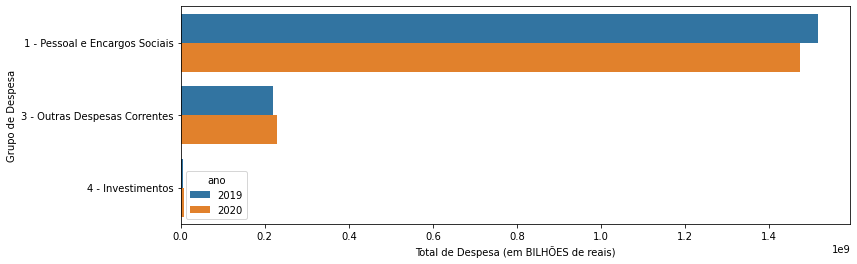

In [137]:
# Visualização em gráfico
plt.figure(figsize=(12,4))
ax = sns.barplot(x="valor_pago",
                 y="grupo_de_despesa", 
                 hue="ano", 
                 orient='h',
                 data=agreg_por_grupo, 
                 ci=None)
plt.xlabel('Total de Despesa (em BILHÕES de reais)')
plt.ylabel('Grupo de Despesa')

As despesas com pessoal anualmente ultrapassam R\$ 1,4 bilhões, sendo 7 vezes mais volumosas que o total de despesas correntes anuais (~R\$ 200 milhões) e até 280 vezes mais volumosas que o total de investimentos anuais (R\$ 5 a 7 milhões).

## 2.2 Anaĺise das despesas correntes
Vamos examinar em detalhe as despesas correntes anuais. Para isso, vamos classificá-las em categorias de "Elementos de Despesa"

In [138]:
despesas_correntes = df.loc[df["grupo_de_despesa"]=="3 - Outras Despesas Correntes"]
despesas_correntes.head(3)

,unid_gestora,area_atuacao,subfuncao,programa_orcamentario,acao_orcamentaria,programa_de_governo,autor_emenda,plano_orcamentario,grupo_de_despesa,elemento_de_despesa,modalidade_de_despesa,valor_empenhado,valor_liquidado,valor_pago,restos_a_pagar_pagos,ano,mes
0,154040 - FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,12 - Educação,364 - Ensino superior,2080 - EDUCACAO DE QUALIDADE PARA TODOS,20RK - FUNCIONAMENTO DE INSTITUICOES FEDERAIS ...,00 - NAO ATRIBUIDO,1479 - AUGUSTO CARVALHO,EIND - EMENDA INDIVIDUAL,3 - Outras Despesas Correntes,18 - Auxílio Financeiro a Estudantes,90 - Reserva de Contingência,0.00,0.00,0.00,9600.00,2019,1
2,154040 - FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,12 - Educação,331 - Proteção e benefícios ao trabalhador,2109 - PROGRAMA DE GESTAO E MANUTENCAO DO MINI...,212B - BENEFICIOS OBRIGATORIOS AOS SERVIDORES ...,00 - NAO ATRIBUIDO,0000,0005 - AUXILIO-ALIMENTACAO DE CIVIS,3 - Outras Despesas Correntes,04 - Contratação por Tempo Determinado,90 - Reserva de Contingência,1084098.47,79379.73,0.00,86703.41,2019,1
3,154040 - FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,13 - Cultura,122 - Administração geral,2107 - PROGRAMA DE GESTAO E MANUTENCAO DO MINI...,2000 - ADMINISTRACAO DA UNIDADE,00 - NAO ATRIBUIDO,0000,0000 - ADMINISTRACAO DA UNIDADE,3 - Outras Despesas Correntes,36 - Outros Serviços de Terceiros - Pessoa Física,90 - Reserva de Contingência,0.00,0.00,0.00,4608.96,2019,1


In [139]:
agreg_por_elemento = despesas_correntes.groupby(['elemento_de_despesa','ano'])['valor_pago'].sum().reset_index()
agreg_por_elemento.sort_values(['valor_pago'], ascending=False, inplace=True)

Text(0, 0.5, 'Elemento de Despesa')

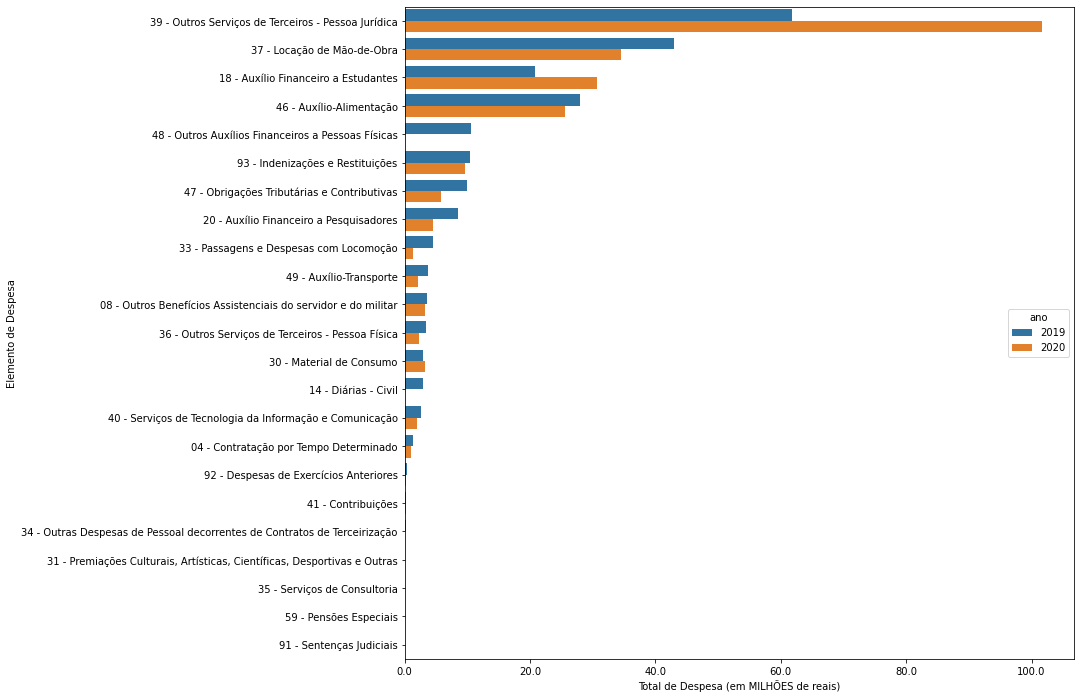

In [140]:
# Visualização em gráfico
plt.figure(figsize=(12,12))
ax = sns.barplot(x="valor_pago",
                 y="elemento_de_despesa", 
                 hue="ano", 
                 orient='h',
                 data=agreg_por_elemento, 
                 ci=None)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))
plt.xlabel('Total de Despesa (em MILHÕES de reais)')
plt.ylabel('Elemento de Despesa')

O maior gasto de despesas correntes da UnB é com o elemento "39 - Outros Serviços de Terceiros - Pessoa Jurídica", e em 2020 as despesas com essa categoria (~R\$ 101 milhoes) superaram em mais de 60% os valores do ano anterior (R\$ 62 milhões).